# Econ 570 Assignment 2 #

In [154]:
def fn_variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)
# Note this is equivalent to np.var(Yt,ddof)

In [155]:
def fn_generate_cov(dim):
    acc  = []
    for i in range(dim):
        row = np.ones((1,dim)) * corr
        row[0][i] = 1
        acc.append(row)
    return np.concatenate(acc,axis=0)

def fn_generate_multnorm(nobs,corr,nvar):

    mu = np.zeros(nvar)
    std = (np.abs(np.random.normal(loc = 1, scale = .5,size = (nvar,1))))**(1/2)
    # generate random normal distribution
    acc = []
    for i in range(nvar):
        acc.append(np.reshape(np.random.normal(mu[i],std[i],nobs),(nobs,-1)))
    
    normvars = np.concatenate(acc,axis=1)

    cov = fn_generate_cov(nvar)
    C = np.linalg.cholesky(cov)

    Y = np.transpose(np.dot(C,np.transpose(normvars)))

#     return (Y,np.round(np.corrcoef(Y,rowvar=False),2))
    return Y

def fn_randomize_treatment(N,p=0.5):
    treated = random.sample(range(N), round(N*p))
    return np.array([(1 if i in treated else 0) for i in range(N)]).reshape([N,1])


In [156]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from tqdm import tqdm
random.seed(10)

Mean intercept intercept=1.012 

Mean intercept slope=1.376 

Mean intercept intercept=1.090 

Mean intercept slope=1.359 



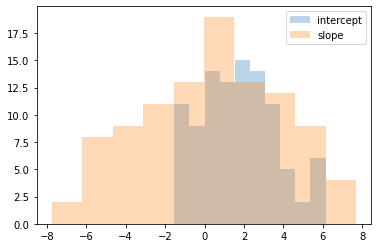

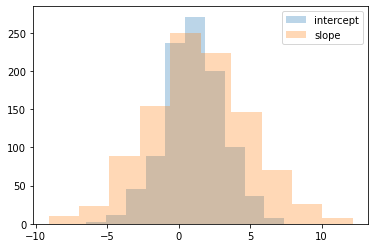

In [157]:
class MC_Simulator():
    
    def __init__(self,n_rep):
        """
        n_rep: number of MC replications
        
        """
        self.n_rep = n_rep
    def simulate_data(self, a, b,n,sigma):
        """
        a: intercept
        b: slope
        n: sample size
        sigma: error variance
        Y = a+b*X+e
        """
        X = np.random.uniform(0,1,100)
        e = np.random.normal(0,10,100)
        Y = a+b*np.log(1+X)+e
        
        return (Y,X)
    
    def estimate_ols_params(self,Y,X):
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        
        return res.params
    
    def run_mc_simulation(self,a,b,n,sigma):
        
        a_estimates = []
        b_estimates = []
        for rep in range(self.n_rep):
            Y,X = self.simulate_data(a,b,n,sigma)
            a_hat,b_hat = self.estimate_ols_params(Y,X)
            a_estimates = a_estimates + [a_hat]
            b_estimates = b_estimates + [b_hat]
        return a_estimates, b_estimates
    
    def summarize_mc_simulation(self,a,b,n,sigma):
        a_estimates, b_estimates = self.run_mc_simulation(a,b,n,sigma)
        print(f'Mean intercept intercept={np.mean(a_estimates):.3f} \n')
        print(f'Mean intercept slope={np.mean(b_estimates):.3f} \n')
         
    def plot_parameter_estimates(self,a,b,n,sigma,alpha):
        a_estimates, b_estimates = self.run_mc_simulation(a,b,n,sigma)
        
        fig = plt.figure()
        plt.hist(a_estimates, label = 'intercept', alpha = alpha)
        plt.hist(b_estimates, label = 'slope', alpha = alpha)
        plt.legend()
    #sample Size 100 #    
mcSim = MC_Simulator(100)
mcSim.summarize_mc_simulation(1,2,10,0.1)
mcSim.plot_parameter_estimates(1,2,10,0.1,.3)
    #Sample Size 1000#
mcSim = MC_Simulator(1000)
mcSim.summarize_mc_simulation(1,2,10,0.1)
mcSim.plot_parameter_estimates(1,2,10,0.1,.3)

# Question 1:
# Simulate a DGP where the outcome of interest depends on a randomly assigned treatment and some observed covariates. 
# Case a: You do not control for any covariates
# Part 1 : Simulate a DGP

In [158]:
# Yi=a+b*Xi+ei
#Yi=a+b*log(1+xi)+ei
#ei~N(0,sigma^2)

In [159]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

(array([ 1., 11., 15., 44., 48., 48., 20.,  7.,  4.,  2.]),
 array([-9.47966637, -7.25908842, -5.03851047, -2.81793251, -0.59735456,
         1.62322339,  3.84380134,  6.0643793 ,  8.28495725, 10.5055352 ,
        12.72611315]),
 <BarContainer object of 10 artists>)

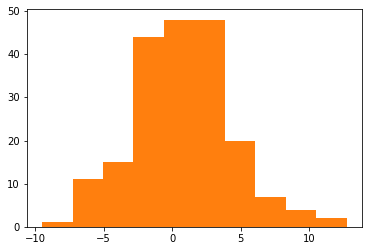

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
a = .5
b = 1.2
n = 100

slope_estimates = []
# sample size 100
for mc_replication in range(100):
    X = np.random.uniform(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*np.log(1+X)+e
    mod = sm.OLS(Y,sm.add_constant(X))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    
np.mean(slope_estimates)
plt.hist(slope_estimates)

for mc_replication in range(100):
    X = np.random.uniform(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*np.log(1+X)+e
    mod = sm.OLS(Y,sm.add_constant(X))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    
np.mean(slope_estimates)
plt.hist(slope_estimates)

In [72]:
tau = 2
corr = .5
conf=False
p = 100
p0 = 0 # number of covariates used in the DGP
Nrange = range(10,1000,2) # loop over N values
(nvalues,tauhats,sehats,lb,ub) = fn_run_experiments(tau,Nrange,p,p0,corr,conf)

100%|████████████████████████████████████████| 495/495 [00:03<00:00, 148.52it/s]


In [ ]:
caption = """Estimates of the treatment effect parameter 
    for a randomized experiment without confounders"""
fn_plot_with_ci(nvalues,tauhats,tau,lb,ub,caption)

In [109]:
def fn_generate_data(tau,N,p,p0,corr,conf = True,flagX = False):
    """
    p0(int): number of covariates with nonzero coefficients
    """
    nvar = p+2 # 1 confounder and variable for randomizing treatment
    corr = 0.5 # correlation for multivariate normal

    if conf==False:
        conf_mult = 0 # remove confounder from outcome
    allX = fn_generate_multnorm(N,corr,nvar)
    W0 = allX[:,0].reshape([N,1]) # variable for RDD assignment
    C = allX[:,1].reshape([N,1]) # confounder
    X = allX[:,2:] # observed covariates
    
    T = fn_randomize_treatment(N) # choose treated units
    err = np.random.normal(0,1,[N,1])
    beta0 = np.random.normal(5,5,[p,1])
    
    beta0[p0:p] = 0 # sparse model
    Yab = tau*T+X@beta0+conf_mult*0.6*C+err
    if flagX==False:
        return (Yab,T)
    else:
        return (Yab,T,X)
    
    # regression discontinuity
#     W = W0 + 0.5*C+3*X[:,80].reshape([N,1])-6*X[:,81].reshape([N,1])
#     treated = 1*(W>0)
#     Yrdd = 1.2* treated - 4*W + X@beta0 +0.6*C+err

def fn_tauhat_means(Yt,Yc):
    nt = len(Yt)
    nc = len(Yc)
    tauhat = np.mean(Yt)-np.mean(Yc)
    se_tauhat = (np.var(Yt,ddof=1)/nt+np.var(Yc,ddof=1)/nc)**(1/2)
    return (tauhat,se_tauhat)

def fn_bias_rmse_size(theta0,thetahat,se_thetahat,cval = 1.96):
    """
    theta0 - true parameter value
    thetatahat - estimated parameter value
    se_thetahat - estiamted se of thetahat
    """
    b = thetahat - theta0
    bias = np.mean(b)
    rmse = np.sqrt(np.mean(b**2))
    tval = b/se_thetahat # paramhat/se_paramhat H0: theta = 0
    size = np.mean(1*(np.abs(tval)>cval))
    # note size calculated at true parameter value
    return (bias,rmse,size)

def fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX=False):
    n_values = []
    tauhats = []
    sehats = []
    lb = []
    ub = []
    for N in tqdm(Nrange):
        n_values = n_values + [N]
        if flagX==False:
            Yexp,T = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Yt = Yexp[np.where(T==1)[0],:]
            Yc = Yexp[np.where(T==0)[0],:]
            tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)            
        elif flagX==1:
            # use the right covariates in regression
            Yexp,T,X = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Xobs = X[:,:p0]
            covars = np.concatenate([T,Xobs],axis = 1)
            mod = sm.OLS(Yexp,covars)
            res = mod.fit()
            tauhat = res.params[0]
            se_tauhat = res.HC1_se[0]
        elif flagX==2:
            # use some of the right covariates and some "wrong" ones
            Yexp,T,X = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Xobs1 = X[:,:np.int(p0/2)]
            Xobs2 = X[:,-np.int(p0/2):]
            covars = np.concatenate([T,Xobs1,Xobs2],axis = 1)
            mod = sm.OLS(Yexp,covars)
            res = mod.fit()
            tauhat = res.params[0]
            se_tauhat = res.HC1_se[0]
            
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]    
        lb = lb + [tauhat-1.96*se_tauhat]
        ub = ub + [tauhat+1.96*se_tauhat]
        
    return (n_values,tauhats,sehats,lb,ub)


def fn_plot_with_ci(n_values,tauhats,tau,lb,ub,caption):
    fig = plt.figure(figsize = (10,6))
    plt.plot(n_values,tauhats,label = '$\hat{\\tau}$')
    plt.xlabel('N')
    plt.ylabel('$\hat{\\tau}$')
    plt.axhline(y=tau, color='r', linestyle='-',linewidth=1,
                label='True $\\tau$={}'.format(tau))
    plt.title('{}'.format(caption))
    plt.fill_between(n_values, lb, ub,
        alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
    plt.legend()

# Part 2: Illustrate DGP with DAP

In [ ]:
g = gr.Digraph()
g.edge("Ti","Y")
g.edge("Xi","Y",style="dashed")
g

# Part3:Show, using a Monte Carlo experiment with sample sizes 
# N=100 and N=1000, what the bias, RMSE and size of your treatment effect estimate 

In [ ]:
#Yi=a*Ai+ei

In [ ]:
N = 100
Yexp,T = fn_generate_data(tau,N,10,0,corr,conf = False)
Yt = Yexp[np.where(T==1)[0],:]
Yc = Yexp[np.where(T==0)[0],:]
tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)
# n_values = n_values + [N]
# tauhats = tauhats + [tauhat]
lb = lb + [tauhat-1.96*se_tauhat]
ub = ub + [tauhat+1.96*se_tauhat]

In [93]:
tauhat,se_tauhat

(2.030766901557099, 0.06389620952161)

In [94]:
# np.linalg.inv(np.transpose(T)@T)@np.transpose(T)@Yexp
const = np.ones([N,1])

In [73]:
N = 1000
Yexp,T = fn_generate_data(tau,N,10,0,corr,conf = False)
Yt = Yexp[np.where(T==1)[0],:]
Yc = Yexp[np.where(T==0)[0],:]
tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)
# n_values = n_values + [N]
# tauhats = tauhats + [tauhat]
lb = lb + [tauhat-1.96*se_tauhat]
ub = ub + [tauhat+1.96*se_tauhat]

In [74]:
tauhat,se_tauhat

(1.9758723752331497, 0.06514541183100618)

In [75]:
# np.linalg.inv(np.transpose(T)@T)@np.transpose(T)@Yexp
const = np.ones([N,1])

In [76]:
model = sm.OLS(Yexp,np.concatenate([T,const],axis = 1))
res = model.fit()
# res.summary()
res.params[0], res.HC1_se[0]

(1.97587237523315, 0.06514541183100618)

In [78]:
estDict = {}
R = 2000
for N in [100,1000]:
    tauhats = []
    sehats = []
    for r in tqdm(range(R)):
        Yexp,T = fn_generate_data(tau,N,10,0,corr,conf)
        Yt = Yexp[np.where(T==1)[0],:]
        Yc = Yexp[np.where(T==0)[0],:]
        tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]
    estDict[N] = {
        'tauhat':np.array(tauhats).reshape([len(tauhats),1]),
        'sehat':np.array(sehats).reshape([len(sehats),1])
    }

100%|██████████████████████████████████████| 2000/2000 [00:11<00:00, 168.04it/s]


In [79]:
tau0 = tau*np.ones([R,1])
for N, results in estDict.items():
    (bias,rmse,size) = fn_bias_rmse_size(tau0,results['tauhat'],
                                         results['sehat'])
    print(f'N={N}: bias={bias}, RMSE={rmse}, size={size}')
    

N=100: bias=0.004080695708597207, RMSE=0.19949166675375374, size=0.052
N=1000: bias=0.001981971819978039, RMSE=0.06223656303740326, size=0.0425


# Part 4: Real example in the real life

The SAT score is  an important factor as the admission standard to be admitted into university.However,if we add other factors,which may casue other issue like multicollinearity or ATE maybe not balance,and we need to control other covariates to achieve balance.

# Case b: You control for all the covariates that affect the outcome

# Part 1:Simulate a DGP

In [ ]:
#Yi=a*Ai+b*xi+ei

In [80]:
tau = 2
corr = .5
conf=False
p = 100
p0 = 100 # number of covariates used in the DGP
Nrange = range(10,1000,2) # loop over N values
(nvalues_x,tauhats_x,sehats_x,lb_x,ub_x) = fn_run_experiments(tau,Nrange,p,p0,corr,conf)

100%|████████████████████████████████████████| 495/495 [00:03<00:00, 148.65it/s]


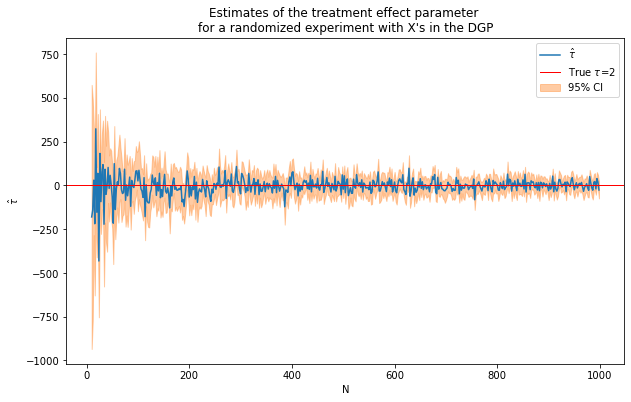

In [81]:
caption = """Estimates of the treatment effect parameter 
for a randomized experiment with X's in the DGP"""
fn_plot_with_ci(nvalues_x,tauhats_x,tau,lb_x,ub_x,caption)

# Part 2: Illustrate DGP with DAG

In [ ]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("X2", "Y")
g

# Part 3:Show, using a Monte Carlo experiment with sample sizes 
# N=100 and N=1000, what the bias, RMSE and size of your treatment effect estimate 

In [82]:
#Sample Size =100#
tau = 2
corr = .5
conf=False
p = 100
p0 = 100 # number of covariates used in the DGP
Nrange = range(10,1000,2) # loop over N values
(nvalues_x,tauhats_x,sehats_x,lb_x,ub_x) = fn_run_experiments(tau,Nrange,p,p0,corr,conf)

100%|████████████████████████████████████████| 495/495 [00:03<00:00, 149.66it/s]


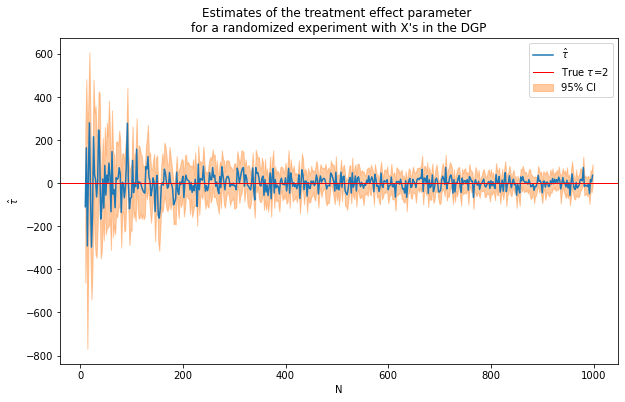

In [83]:
caption = """Estimates of the treatment effect parameter 
for a randomized experiment with X's in the DGP"""
fn_plot_with_ci(nvalues_x,tauhats_x,tau,lb_x,ub_x,caption)

In [130]:
#Sample Size =1000#
tau = 2
corr = .5
conf=False
p = 1000
p0 = 1000 # number of covariates used in the DGP
Nrange = range(10,1000,2) # loop over N values
(nvalues_x,tauhats_x,sehats_x,lb_x,ub_x) = fn_run_experiments(tau,Nrange,p,p0,corr,conf)

100%|█████████████████████████████████████████| 495/495 [00:41<00:00, 11.92it/s]


In [ ]:
caption = """Estimates of the treatment effect parameter 
for a randomized experiment with X's in the DGP"""
fn_plot_with_ci(nvalues_x,tauhats_x,tau,lb_x,ub_x,caption)

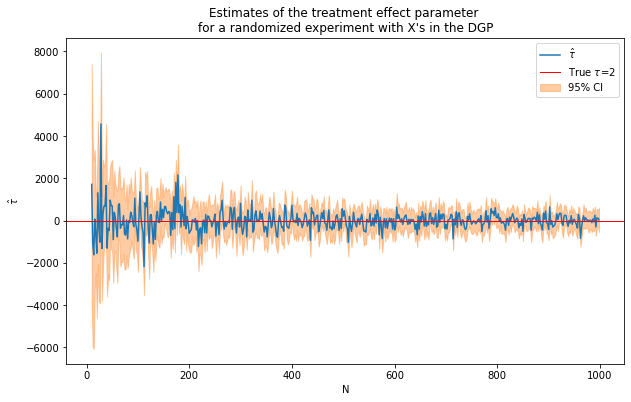

In [85]:
#Sample Size =100#
tau = 2
corr = .5
# def fn_generate_data(tau,N,p,p0,corr,conf = True,flagX = False):In this function we set default value:conf=true
p = 100
p0 = 50 # number of covariates used in the DGP
Nrange = range(100,1000,2) # loop over N values
# we need to start with more observations than p
flagX = 1  #use the right covariates in regression
(nvalues2,tauhats2,sehats2,lb2,ub2) = fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX)

In [96]:
estDict = {}
R = 2000
for N in [100,1000]:
    tauhats = []
    sehats = []
    for r in tqdm(range(R)):
        Yexp,T = fn_generate_data(tau,N,10,0,corr,conf)
        Yt = Yexp[np.where(T==1)[0],:]
        Yc = Yexp[np.where(T==0)[0],:]
        tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]
    estDict[N] = {
        'tauhat':np.array(tauhats).reshape([len(tauhats),1]),
        'sehat':np.array(sehats).reshape([len(sehats),1])
    }

100%|██████████████████████████████████████| 2000/2000 [00:12<00:00, 156.69it/s]


In [97]:
tau0 = tau*np.ones([R,1])
for N, results in estDict.items():
    (bias,rmse,size) = fn_bias_rmse_size(tau0,results['tauhat'],
                                         results['sehat'])
    print(f'N={N}: bias={bias}, RMSE={rmse}, size={size}')
    


N=100: bias=0.006072356556541673, RMSE=0.19956936637295464, size=0.0505
N=1000: bias=-0.0013677021371358033, RMSE=0.06384240487674106, size=0.049


In [98]:
def fn_generate_data(tau,N,p,p0,corr,conf = True,flagX = False):
    """
    p0(int): number of covariates with nonzero coefficients
    """
    nvar = p+2 # 1 confounder and variable for randomizing treatment
    corr = 0.5 # correlation for multivariate normal

    if conf==False:
        conf_mult = 0 # remove confounder from outcome
        
    allX = fn_generate_multnorm(N,corr,nvar)
    W0 = allX[:,0].reshape([N,1]) # variable for RDD assignment
    C = allX[:,1].reshape([N,1]) # confounder
    X = allX[:,2:] # observed covariates
    
    T = fn_randomize_treatment(N) # choose treated units
    err = np.random.normal(0,1,[N,1])
    beta0 = np.random.normal(5,5,[p,1])
    
    beta0[p0:p] = 0 # sparse model
    Yab = tau*T+X@beta0+conf_mult*0.6*C+err
    if flagX==False:
        return (Yab,T)
    else:
        return (Yab,T,X)
    
    # regression discontinuity
#     W = W0 + 0.5*C+3*X[:,80].reshape([N,1])-6*X[:,81].reshape([N,1])
#     treated = 1*(W>0)
#     Yrdd = 1.2* treated - 4*W + X@beta0 +0.6*C+err

def fn_tauhat_means(Yt,Yc):
    nt = len(Yt)
    nc = len(Yc)
    tauhat = np.mean(Yt)-np.mean(Yc)
    se_tauhat = (np.var(Yt,ddof=1)/nt+np.var(Yc,ddof=1)/nc)**(1/2)
    return (tauhat,se_tauhat)

def fn_bias_rmse_size(theta0,thetahat,se_thetahat,cval = 1.96):
    """
    theta0 - true parameter value
    thetatahat - estimated parameter value
    se_thetahat - estiamted se of thetahat
    """
    b = thetahat - theta0
    bias = np.mean(b)
    rmse = np.sqrt(np.mean(b**2))
    tval = b/se_thetahat # paramhat/se_paramhat H0: theta = 0
    size = np.mean(1*(np.abs(tval)>cval))
    # note size calculated at true parameter value
    return (bias,rmse,size)

def fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX=False):
    n_values = []
    tauhats = []
    sehats = []
    lb = []
    ub = []
    for N in tqdm(Nrange):
        n_values = n_values + [N]
        if flagX==False:
            Yexp,T = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Yt = Yexp[np.where(T==1)[0],:]
            Yc = Yexp[np.where(T==0)[0],:]
            tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)            
        elif flagX==1:
            # use the right covariates in regression
            Yexp,T,X = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Xobs = X[:,:p0]
            covars = np.concatenate([T,Xobs],axis = 1)
            mod = sm.OLS(Yexp,covars)
            res = mod.fit()
            tauhat = res.params[0]
            se_tauhat = res.HC1_se[0]
        elif flagX==2:
            # use some of the right covariates and some "wrong" ones
            Yexp,T,X = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Xobs1 = X[:,:np.int(p0/2)]
            Xobs2 = X[:,-np.int(p0/2):]
            covars = np.concatenate([T,Xobs1,Xobs2],axis = 1)
            mod = sm.OLS(Yexp,covars)
            res = mod.fit()
            tauhat = res.params[0]
            se_tauhat = res.HC1_se[0]
            
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]    
        lb = lb + [tauhat-1.96*se_tauhat]
        ub = ub + [tauhat+1.96*se_tauhat]
        
    return (n_values,tauhats,sehats,lb,ub)


def fn_plot_with_ci(n_values,tauhats,tau,lb,ub,caption):
    fig = plt.figure(figsize = (10,6))
    plt.plot(n_values,tauhats,label = '$\hat{\\tau}$')
    plt.xlabel('N')
    plt.ylabel('$\hat{\\tau}$')
    plt.axhline(y=tau, color='r', linestyle='-',linewidth=1,
                label='True $\\tau$={}'.format(tau))
    plt.title('{}'.format(caption))
    plt.fill_between(n_values, lb, ub,
        alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
    plt.legend()

# Part 4: real example in our life
In many researches, we finds that the univerisity admissions have the prefences to admit some students.They focus on the students' family background,prevous education experience and test scores.So if a student is admitted by a university,the admission must take conprehensive consideration.However,if we take too many factors into accounts such as weight and height,which may disturb the results.

# Question 2:Simulate a DGP with a confounder (common cause)
# Case a. You fail to control for the confounder

# Part 1: Simulate a DGP

In [123]:
tau = 2
corr = .5
# def fn_generate_data(tau,N,p,p0,corr,conf = True,flagX = False):In this function we set default value:conf=true
p = 100
p0 = 50 # number of covariates used in the DGP
Nrange = range(100,1000,2) # loop over N values
# we need to start with more observations than p
flagX = 1  #use the right covariates in regression
(nvalues2,tauhats2,sehats2,lb2,ub2) = fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX)

100%|█████████████████████████████████████████| 450/450 [00:05<00:00, 88.83it/s]


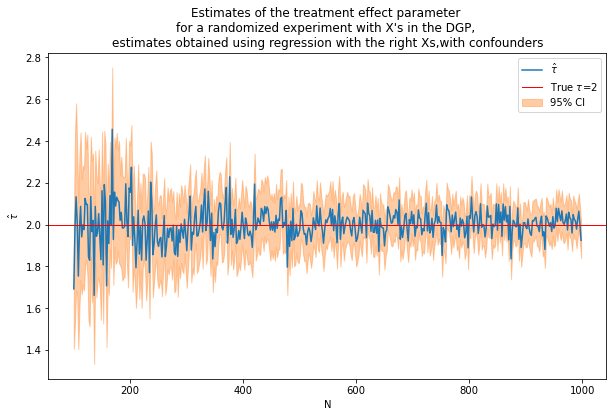

In [124]:
caption = """Estimates of the treatment effect parameter 
for a randomized experiment with X's in the DGP, 
estimates obtained using regression with the right Xs,with confounders"""
fn_plot_with_ci(nvalues2,tauhats2,tau,lb2,ub2,caption)

# Part 2: Illustrate DGP with DAG

In [ ]:
g = gr.Digraph()
g.edge("Ti","Y")
g.edge("right Xi","Y")
g.edge("conf","Y", style="dashed")
g.edge("conf","Ti",style="dashed")
g

# Part 3:Show, using a Monte Carlo experiment with sample sizes N=100 and N=1000, what the bias, RMSE and size of your treatment effect estimate is

In [128]:
#Sample Size =100#
tau = 2
corr = .5
# def fn_generate_data(tau,N,p,p0,corr,conf = True,flagX = False):In this function we set default value:conf=true
p = 100
p0 = 50 # number of covariates used in the DGP
Nrange = range(100,1000,2) # loop over N values
# we need to start with more observations than p
flagX = 1  #use the right covariates in regression
(nvalues2,tauhats2,sehats2,lb2,ub2) = fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX)

100%|█████████████████████████████████████████| 450/450 [00:05<00:00, 89.15it/s]


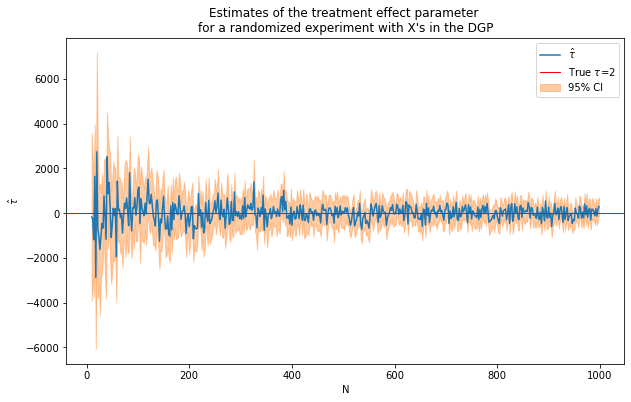

In [134]:
caption = """Estimates of the treatment effect parameter 
for a randomized experiment with X's in the DGP"""
fn_plot_with_ci(nvalues_x,tauhats_x,tau,lb_x,ub_x,caption)

In [ ]:
#Sample Size =1000#
tau = 2
corr = .5
# def fn_generate_data(tau,N,p,p0,corr,conf = True,flagX = False):In this function we set default value:conf=true
p = 1000
p0 = 500 # number of covariates used in the DGP
Nrange = range(100,1000,2) # loop over N values
# we need to start with more observations than p
flagX = 1  #use the right covariates in regression
(nvalues2,tauhats2,sehats2,lb2,ub2) = fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX)

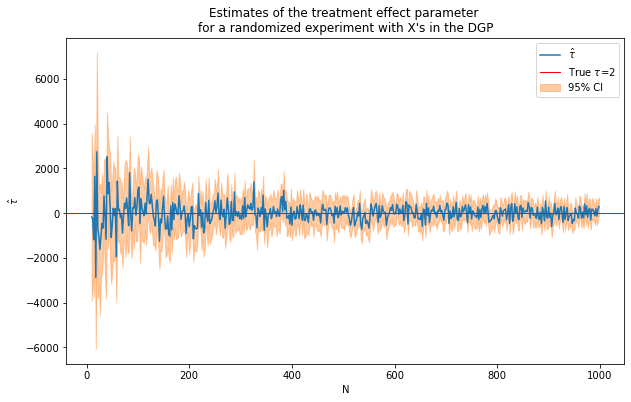

In [136]:
caption = """Estimates of the treatment effect parameter 
for a randomized experiment with X's in the DGP"""
fn_plot_with_ci(nvalues_x,tauhats_x,tau,lb_x,ub_x,caption)

In [131]:
estDict = {}
R = 2000
for N in [100,1000]: #we have different sample sizes. For each sample size, we are going to run 2000 replications of generating the data.
    tauhats = []
    sehats = []
    for r in tqdm(range(R)): 
        Yexp,T = fn_generate_data(tau,N,10,0,corr,conf)
        Yt = Yexp[np.where(T==1)[0],:]  
        Yc = Yexp[np.where(T==0)[0],:]
        tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]
    estDict[N] = {
        'tauhat':np.array(tauhats).reshape([len(tauhats),1]),
        'sehat':np.array(sehats).reshape([len(sehats),1])
    }

100%|██████████████████████████████████████| 2000/2000 [00:13<00:00, 150.45it/s]


In [137]:
tau0 = tau*np.ones([R,1])
for N, results in estDict.items():
    (bias,rmse,size) = fn_bias_rmse_size(tau0,results['tauhat'],
                                         results['sehat'])
    print(f'N={N}: bias={bias}, RMSE={rmse}, size={size}')

N=100: bias=-0.005580352796840722, RMSE=0.2067965009347086, size=0.0595
N=1000: bias=0.0010060681090829004, RMSE=0.06291705162500762, size=0.051


# Part 4 :Give an example of a real-life situation that might be consistent with the DGP

#### We assume that the treatment is education and the outcome is income. It is hard to know the causal effect of education on the wage because both share a common cause: intelligence. intelligence causes education and income directly. So there is confounding on the relationship between the treatment education and the outcome wage. 

# Case b: You do control for the confounder

# Part 1: Simulate a DGP

In [141]:
tau = 2
corr = .5
conf = False
p = 100
p0 = 50 # number of covariates used in the DGP
Nrange = range(100,1000,2) # loop over N values
# we need to start with more observations than p
flagX = 1  #use the right covariates in regression
(nvalues2,tauhats2,sehats2,lb2,ub2) = fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX)

100%|█████████████████████████████████████████| 450/450 [00:05<00:00, 77.04it/s]


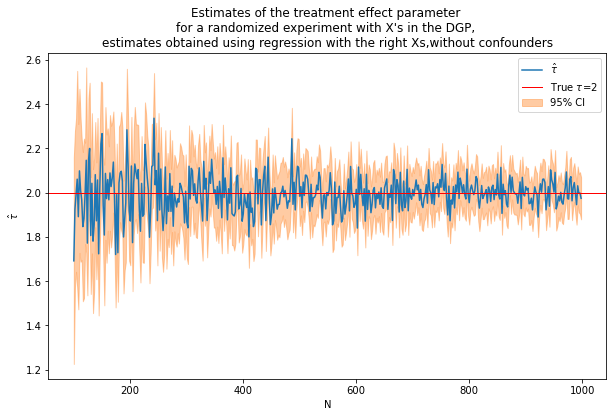

In [142]:
caption = """Estimates of the treatment effect parameter 
for a randomized experiment with X's in the DGP, 
estimates obtained using regression with the right Xs,without confounders"""
fn_plot_with_ci(nvalues2,tauhats2,tau,lb2,ub2,caption)

# Part 2: Illustrate DGP with a DAG

In [ ]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")
g

# Part 3:Show, using a Monte Carlo experiment with sample sizes N=100 and N=1000, what the bias, RMSE and size of your treatment effect estimate is

In [143]:
#Sample Size =100#
tau = 2
corr = .5
conf=False
p = 100
p0 = 50 # number of covariates used in the DGP
Nrange = range(100,1000,2) # loop over N values
# we need to start with more observations than p
flagX = 1  #use the right covariates in regression
(nvalues2,tauhats2,sehats2,lb2,ub2) = fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX)

100%|█████████████████████████████████████████| 450/450 [00:05<00:00, 86.35it/s]


In [ ]:
caption = """Estimates of the treatment effect parameter 
for a randomized experiment with X's in the DGP"""
fn_plot_with_ci(nvalues_x,tauhats_x,tau,lb_x,ub_x,caption)

In [144]:
#Sample Size =1000#
tau = 2
corr = .5
conf=False
p = 1000
p0 = 500 # number of covariates used in the DGP
Nrange = range(100,1000,2) # loop over N values
# we need to start with more observations than p
flagX = 1  #use the right covariates in regression
(nvalues2,tauhats2,sehats2,lb2,ub2) = fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX)

100%|█████████████████████████████████████████| 450/450 [01:36<00:00,  4.68it/s]


In [ ]:
estDict = {}
R = 2000
for N in [100,1000]: #we have different sample sizes. For each sample size, we are going to run 2000 replications of generating the data.
    tauhats = []
    sehats = []
    for r in tqdm(range(R)): 
        Yexp,T = fn_generate_data(tau,N,10,0,corr,conf)
        Yt = Yexp[np.where(T==1)[0],:]  
        Yc = Yexp[np.where(T==0)[0],:]
        tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]
    estDict[N] = {
        'tauhat':np.array(tauhats).reshape([len(tauhats),1]),
        'sehat':np.array(sehats).reshape([len(sehats),1])
    }

In [145]:
tau0 = tau*np.ones([R,1])
for N, results in estDict.items():
    (bias,rmse,size) = fn_bias_rmse_size(tau0,results['tauhat'],
                                         results['sehat'])
    print(f'N={N}: bias={bias}, RMSE={rmse}, size={size}')

N=100: bias=-0.005580352796840722, RMSE=0.2067965009347086, size=0.0595
N=1000: bias=0.0010060681090829004, RMSE=0.06291705162500762, size=0.051


# Part4 :Give an example of a real-life situation that might be consistent with the DGP.

In [ ]:
g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g


#### In our example, we can’t measure intelligence, but we can measure some causes of it, like the father’s and mother’s education, and some effects of it, like IQ or SAT score. Controlling for those surrogate variables is not sufficient to eliminate bias, but it sure helps.

# Question 3:Simulate a DGP with selection bias into the treatment (variable in between the path from the treatment to the outcome)

# Case a:You control for the variable in between the path from cause to effect
# Part 1:Simulate a DGP

In [147]:
import statsmodels.api as sm
from numpy import sqrt 
import statsmodels.formula.api as smf

In [148]:
#Define a function to simulate data
def fn_generate_selection_data(tau1,N,beta1,lambda_x,conts = False):
    #Inputs
    # -tau: treatment effect parameter
    # -N: Number of observations (Sample size)
    # -conts: Indicating whether we control the mediators(selection bias variable)
    T = fn_randomize_treatment(N) # choose treated units
    err1 = np.random.normal(0,1,[N,1])
    X = beta1*T + err1
    err = np.random.normal(0,1,[N,1])
    Yab = tau1*T+lambda_x*X+err
    if conts == False:
        X = np.zeros([N,1])
    return Yab, T, X
#Define a function to estimate the treatment effect of random sample using OLS
def fn_estimate_params(Y,T,X):
    #Inputs
    # -Y: Outcome value of Dependent Variable
    # -T: Indicating the treatment group 0/1
    # -X: Value of Mediators(selection bias variable)

    covar = np.hstack([T,X])
    idx = np.argwhere(np.all(covar[..., :] == 0, axis=0))
    covars = np.delete(covar, idx, axis=1)

    mod = sm.OLS(Y,covars)
    res = mod.fit()
    tauhat = res.params[0]
    se_tauhat = res.HC1_se[0]
    return tauhat,se_tauhat
#Define a function to do the monte carlo simulation
def run_mc_simulation(n_rep,tau1,N,beta1,lambda_x,conts = False):
    #Inputs
    # -n_rep: Number of replication time for monte carlo simulation
    # -tau: treatment effect parameter
    # -N: Number of observations (Sample size)
    # -conts: Indicating whether we control the mediators(selection bias variable)

    estDict = {}
    for n in N:
        tauhats = []
        sehats = []
        for rep in tqdm(range(n_rep)):
            Y,T,X = fn_generate_selection_data(tau1,n,beta1,lambda_x,conts)
            tauhat,sehat = fn_estimate_params(Y,T,X)
            tauhats = tauhats + [tauhat]
            sehats = sehats + [sehat]
        estDict[n] = {
        'tauhat':np.array(tauhats).reshape([len(tauhats),1]),
        'sehat':np.array(sehats).reshape([len(sehats),1])
        }

    return estDict

#Define a function to summarize the results of monte carlo simulation
def summarize_mc_simulation(tau1,lambda_x,beta1,n_rep,N,estDict):
    tau0 = (tau1+lambda_x*beta1)*np.ones([n_rep,1])
    for N, results in estDict.items():
        (bias,rmse,size) = fn_bias_rmse_size(tau0,results['tauhat'],
                                             results['sehat'])

        print(f'N={N}: bias={bias}, RMSE={rmse}, size={size}')

In [149]:
np.random.seed(73)
n = 1000
# generate treatment
T = np.random.binomial(1, 0.5, n)
# generate outcome
Y = np.random.normal(1 + 1*T, 5).astype(int)
# generate covariate
X = np.random.normal(10+np.mean(T)*np.mean(Y),5,n)

data3 = pd.DataFrame(dict(T = T,
                            X = X,
                            Y = Y))
data3.to_csv("data3.csv", index=False)

# Part 2:Illustrate DGP with DAG

In [ ]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g

# Part 3:Show, using a Monte Carlo experiment with sample sizes N=100 and N=1000, what the bias, RMSE and size of your treatment effect estimate is

In [150]:
print(data3)

     T          X  Y
0    1  19.003576  0
1    1   7.114353 -5
2    1  12.977571  3
3    1   1.666997 -4
4    0  13.139657  3
..  ..        ... ..
995  0   9.399817 -7
996  1  10.033714  7
997  1  17.242560 -5
998  0  16.512007 -3
999  1   8.277151  3

[1000 rows x 3 columns]


In [ ]:
class MC_Simulator_a():
    
    def __init__(self,n_rep):
        """
        n_rep: number of MC replications
        """
        self.n_rep = n_rep
    def simulate_data(self, a, b, c, n,sigma):
        """
        a: intercept
        b: slope of treatment dummy variable
        c: slope of covariate
        n: sample size
        sigma: error variance
        Y = a+b*T+c*X+e
        """
        T = np.random.binomial(1, 0.5, n)
        Y = np.random.normal(1 + 1*T, 5).astype(int)
        X = np.random.normal(10+np.mean(T)*np.mean(Y),5,n)
        
        return (Y,T,X)  
    
    def estimate_ols_params(self,Y,T,X):
        
        mod = sm.OLS(Y,sm.add_constant(pd.concat([pd.Series(T),pd.Series(X)],axis=1)))
        res = mod.fit()
        
        return res.params
    
    def run_mc_simulation(self,a,b,c,n,sigma):
        
        treatment_effect = []
        bias = []
        RMSE = []
        for rep in range(self.n_rep):
            Y,T,X = self.simulate_data(a,b,c,n,sigma)
            a_hat,b_hat,c_hat = self.estimate_ols_params(Y,T,X)
            y_hat = a_hat + b_hat * T + c_hat * X
            treatment_effect = treatment_effect + [b_hat]
            bias = bias + [np.mean(Y[T==1])-np.mean(Y[T==0])]
            RMSE = RMSE + [np.sqrt(np.mean((Y-y_hat)**2))]
        return bias, RMSE, treatment_effect
    
    def summarize_mc_simulation(self,a,b,c,n,sigma):
        bias, RMSE, treatment_effect = self.run_mc_simulation(a,b,c,n,sigma)
        return [np.mean(bias),np.mean(RMSE),np.mean(treatment_effect)]

In [ ]:
# N=100
mcSim_100 = MC_Simulator_a(10000)
res_100 = mcSim_100.summarize_mc_simulation(1,1,1,100,1)
# N=1000
mcSim_1000 = MC_Simulator_a(10000)
res_1000 = mcSim_1000.summarize_mc_simulation(1,1,1,1000,1)
res = pd.concat([pd.Series(res_100),pd.Series(res_1000)],axis = 1)
res.columns = [['N=100','N=1000']]
res.index = [['bias','RMSE','treatment effect']]
res

# Part 4:Give an example of a real-life situation that might be consistent with the DGP.

#### Since the eduaction may have the impact on the wages ,both wages and eduaction may affect the investment meaures.More educated people both earn more and invest more. Also, those who earn more invest more. Since investment is a collider, by conditioning on it, you are opening a second path between the treatment and the outcome, which will make it harder to measure the direct effect. One way to think about this is that by controlling investments, you are looking at small groups of the population where investment is the same and then finding the effect of education on those groups. But by doing so, you are also indirectly and inadvertently not allowing wages to change much. As a result, you won’t be able to see how education changes wage, because you are not allowing wages to change as it should.


# Case b :You do not control for the variable in between the path from cause to effect

# Part 1 & Part 3

In [ ]:
class MC_Simulator_b():
    
    def __init__(self,n_rep):
        """
        n_rep: number of MC replications
        """
        self.n_rep = n_rep
    def simulate_data(self, a, b, n,sigma):
        """
        a: intercept
        b: slope of treatment dummy variable
        n: sample size
        sigma: error variance
        Y = a+b*T+e
        """
        T = np.random.binomial(1, 0.5, n)
        Y = np.random.normal(1 + 1*T, 5).astype(int)
        X = np.random.normal(10+np.mean(T)*np.mean(Y),5,n)
        
        return (Y,T)    
    
    def estimate_ols_params(self,Y,T):
        mod = sm.OLS(Y,sm.add_constant(T))
        res = mod.fit()
        
        return res.params
    
    def run_mc_simulation(self,a,b,n,sigma):
        
        treatment_effect = []
        bias = []
        RMSE = []
        for rep in range(self.n_rep):
            Y,T = self.simulate_data(a,b,n,sigma)
            a_hat,b_hat = self.estimate_ols_params(Y,T)
            y_hat = a_hat + b_hat * T
            treatment_effect = treatment_effect + [b_hat]
            bias = bias + [np.mean(Y[T==1])-np.mean(Y[T==0])]
            RMSE = RMSE + [np.sqrt(np.mean((Y-y_hat)**2))]
        return bias, RMSE, treatment_effect
    
    def summarize_mc_simulation(self,a,b,n,sigma):
        bias, RMSE, treatment_effect = self.run_mc_simulation(a,b,n,sigma)
        return [np.mean(bias),np.mean(RMSE),np.mean(treatment_effect)]

In [ ]:
# N=100
mcSim_100 = MC_Simulator_b(10000)
res_100 = mcSim_100.summarize_mc_simulation(1,1,100,1)
# N=1000
mcSim_1000 = MC_Simulator_b(10000)
res_1000 = mcSim_1000.summarize_mc_simulation(1,1,1000,1)
res = pd.concat([pd.Series(res_100),pd.Series(res_1000)],axis = 1)
res.columns = [['N=100','N=1000']]
res.index = [['bias','RMSE','treatment effect']]

# Part 2:Illustrate your DGP with a DAG

In [ ]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

# Part 4 : Give an example of a real-life situation that might be consistent with the DGP

#### In the real life, if we can not control all the variables,and even though we control some variables,some of variables are affected by the other variables.Therefore,when we choose the candidate,we can not ignore the variables we decide to control.So it is a good way for us to find an instrument variables.